CHAPTER 07 딥러닝을 시작합니다  
07-3 신경망 모델 훈련

In [21]:
# 데이터 불러오기
from keras.datasets import fashion_mnist 
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
# 데이터 표준화
train_scaled = train_input/255.0
# 훈련 세트, 검증 세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [22]:
# 함수 정의를 통한 모델 만들기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:      # model_fn 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model


In [23]:
model = model_fn()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 컴파일 및 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

verbose: 훈련 과정 출력을 조절   
> 1(기본값) = 에포크마다 진행 막대와 함께 손실 등의 지표가 출력  
> 2 = 진행 막대를 빼고 출력  
> 0 = 훈련 과정 나타내지 않음  

In [25]:
print(history.history.keys()) #훈련 측정값

dict_keys(['accuracy', 'loss'])


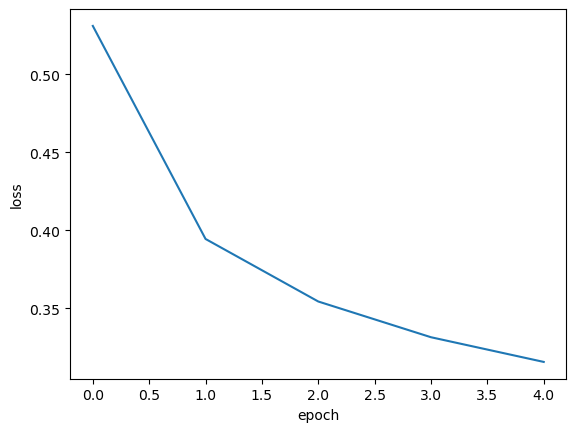

In [26]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

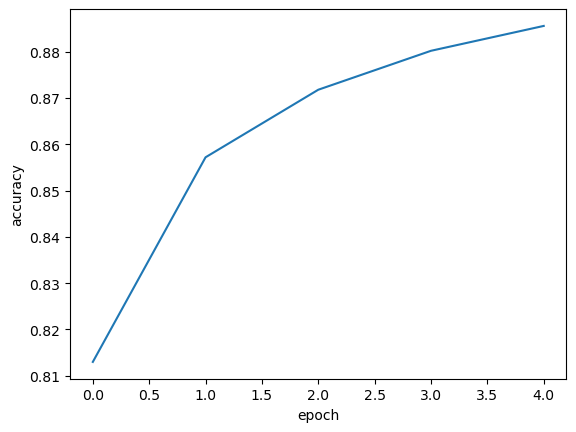

In [27]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

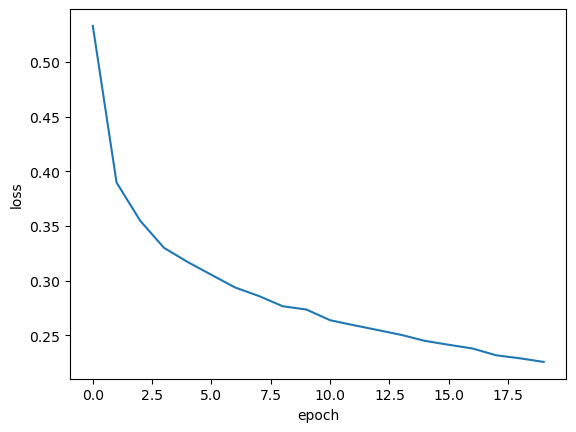

In [ ]:
# 에포크를 20으로 늘려 훈련
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크가 너무 적으면 > 모델이 충분히 학습하지 못해 = 과소적합   
에포크가 너무 많으면 > 훈련 데이터에 너무 맞춰서 외우게 됨 = 과대적합  

[인공 신경망 모델이 최적화 하는 대상]  
: 정확도 아닌 손실함수  

In [32]:
# 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled, val_target))

In [33]:
print(history.history.keys()) # 반환된 history 딕셔너리 값 확인

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


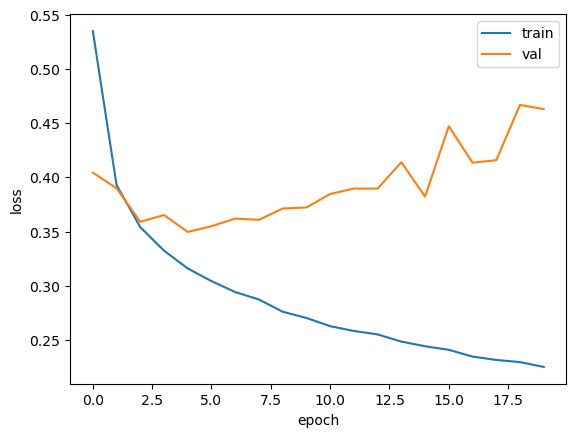

In [34]:
# 훈련 손실, 검증 손실 그래프
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

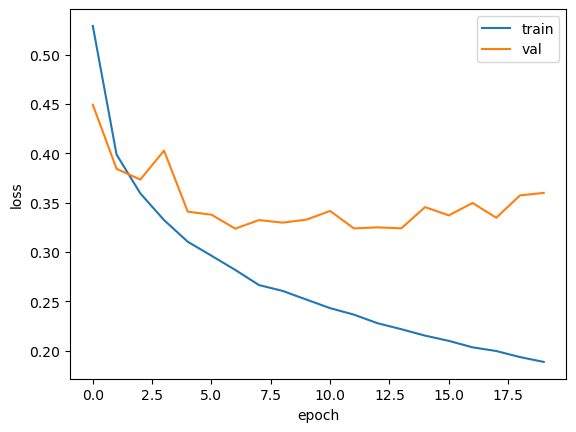

In [35]:
# Adam 옵티마이저 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

[드롭아웃]  
: 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막는 방법  
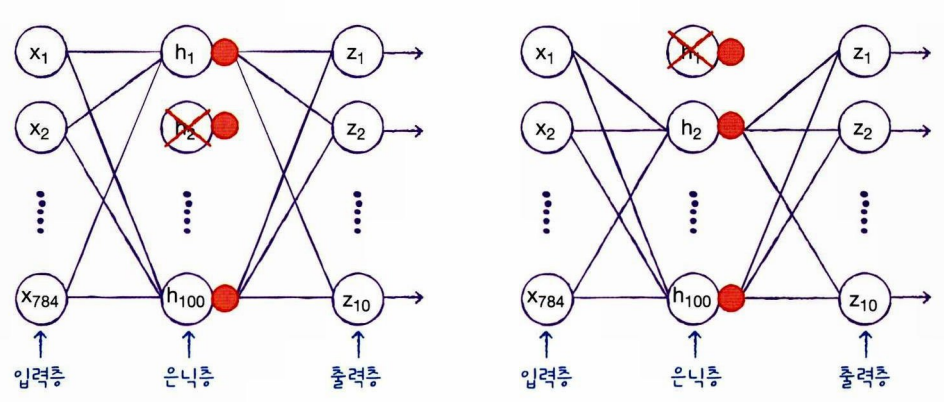

드롭아웃 적용 훈련은 2개의 신경망을 앙상블 하는 것과 같음

In [36]:
# 30% 드롭아웃
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

드롭아웃 층은 훈련되는 모델 파라미터가 없음  
입력과 출력의 크기가 같으며 전체 출력 배열의 크기를 바꾸지 않음  
> 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 함  
= 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않음   

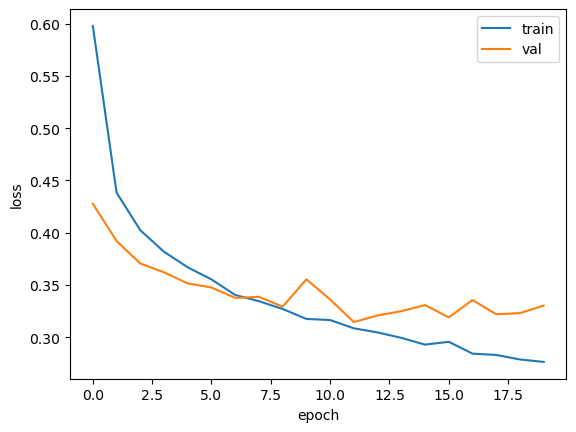

In [37]:
# 드롭아웃 적용한 모델
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

다소 과대적합 일어남   

In [39]:
# 에포크 횟수 11로 지정해 모델 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target))

In [43]:
# 모델 구조와 파라미터 함께 저장하는 save() 메서드
# .keras 확장자를 가진 팡리에 필요한 정보를 압축하여 저장
model.save('model-whole.keras')

In [44]:
# 모델의 파라미터만 저장하는 save_weights() 메서드
# 파라미터를 HDF5 포맷으로 저장, 확장자는 weights.h5
model.save_weights('model.weights.h5')

In [ ]:
# 파일 확인
!ls -al model*

-rw-r--r-- 1 user15 user15 979394 Nov 14 20:20 model-whole.keras
-rw-r--r-- 1 user15 user15 976600 Nov 14 20:20 model.weights.h5


In [47]:
# 새로운 모델 만들어 model-weights.h5 파일에서 훈련된 모델 파라미터 읽어 사용하기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) 
print(np.mean(val_labels == val_target)) # 두 배열에서 각 위치의 값이 같으면 1, 다르면 0, 이걸 평균하면 정확도

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.88375


argmax() 함수 이용해 모델의 predict() 메서드 결과에서 가장 큰 값을 고름   
axis=-1 : 배열의 마지막 차원 따라 최댓값 고름(여기서는 1)   
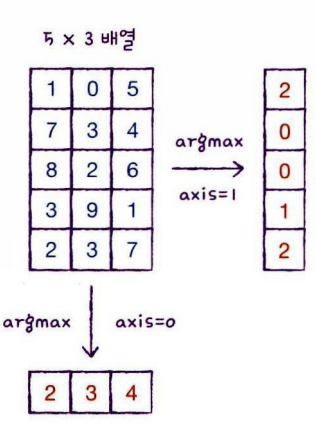

In [50]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.3224


[0.3235680162906647, 0.8837500214576721]

[콜백]  
: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체  

[ModelCheckpoint 콜백]  
: 에포크마다 모델을 저장  
: save_best_only=True 매개변수를 지정해 가장 낮은 검증 손실을 만드는 모델 저장 가능  


In [54]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) # 체크포인트 만들어
model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb]) # fit() 메서드의 callbacks 매개변수에 리스트로 감싸 전달

In [55]:
model = keras.models.load_model('best-model.keras') # 저장된 모델 읽어오기
model.evaluate(val_scaled, val_target) # 예측 수행

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.3175


[0.317931592464447, 0.8849166631698608]

[조기종료]  
: 과대적합이 시작되기 전에 훈련을 미리 중지하는 것    
> EarlyStopping 콜백 제공    
- patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정  
- patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지  
- restore_best_weights=True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

In [ ]:
# EarlyStopping 콜백 + ModelCheckpoint 콜백 함께 사용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) # 가장 낮은 검증 손실 만드는 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 조기종료
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [58]:
print(early_stopping_cb.stopped_epoch)

12


에포크 횟수가 0부터 시작하므로 13번째 에포크에서 훈련이 중지되었음을 의미함  
patience를 2로 지정했으므로 최상의 모델은 11번째 에포크

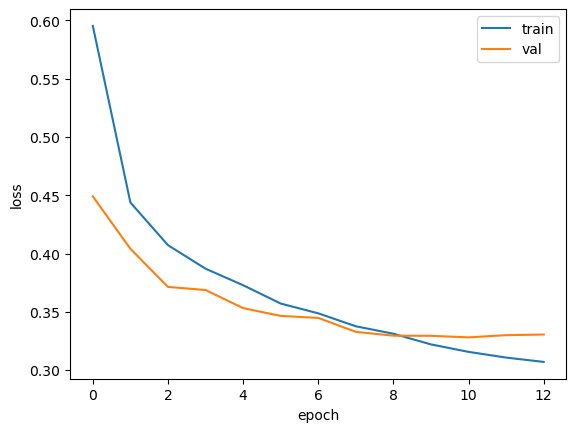

In [59]:
# 훈련 손실과 검증 손실 출력
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [61]:
# 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.3300


[0.32807695865631104, 0.8817499876022339]